#### Import modules

In [28]:
from keras.models import load_model
import pandas as pd
import numpy as np
import librosa
import joblib
import os
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [29]:
# Load the trained model
model = load_model("saved_model/ser_model.h5")

# Load the fitted encoder
encoder = joblib.load('saved_model/encoder.pkl')

In [30]:
# Function to extract MFCC features from the audio data
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=4, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [31]:
def extract_emotion(filename):
    parts = filename.split('-')
    emotion = parts[2]
    # Combine 'calm' (02) and 'neutral' (01) emotions into a single category
    if emotion in ['01', '02']:
        emotion = 'neutral'
    elif emotion == '03':
        emotion = 'happy'
    elif emotion == '04':
        emotion = 'sad'
    elif emotion == '05':
        emotion = 'angry'
    elif emotion == '06':
        emotion = 'fear'
    elif emotion == '07':
        emotion = 'disgust'
    elif emotion == '08':
        emotion = 'surprise'

    return emotion

In [32]:
ravdess_paths = []
ravdess_emotions = []

for dirname, _, filenames in os.walk('test_data/Actor_14'):
    for filename in filenames:
        if filename.endswith('.wav'):
            ravdess_paths.append(os.path.join(dirname, filename))
            emotion = extract_emotion(filename)
            ravdess_emotions.append(emotion)


ravdess_df = pd.DataFrame()
ravdess_df['path'] = ravdess_paths
ravdess_df['emotion'] = ravdess_emotions

In [33]:
ravdess_df

,path,emotion
0,test_data/Actor_14\03-01-01-01-01-01-14.wav,neutral
1,test_data/Actor_14\03-01-01-01-01-02-14.wav,neutral
2,test_data/Actor_14\03-01-01-01-02-01-14.wav,neutral
3,test_data/Actor_14\03-01-01-01-02-02-14.wav,neutral
4,test_data/Actor_14\03-01-02-01-01-01-14.wav,neutral
5,test_data/Actor_14\03-01-02-01-01-02-14.wav,neutral
6,test_data/Actor_14\03-01-02-01-02-01-14.wav,neutral
7,test_data/Actor_14\03-01-02-01-02-02-14.wav,neutral
8,test_data/Actor_14\03-01-02-02-01-01-14.wav,neutral
9,test_data/Actor_14\03-01-02-02-01-02-14.wav,neutral


In [34]:
print(ravdess_df['emotion'].value_counts())

emotion
neutral     12
happy        8
sad          8
angry        8
fear         8
disgust      8
surprise     8
Name: count, dtype: int64


In [35]:
ravdess_df['mfcc'] = ravdess_df['path'].apply(lambda x: extract_mfcc(x))

In [36]:
X_female = np.array([x for x in ravdess_df['mfcc']])
X_female = np.expand_dims(X_female, -1)
y_female = encoder.fit_transform(ravdess_df[['emotion']]).toarray()

In [37]:
# Make predictions for female data
y_female_pred = model.predict(X_female)
y_female_pred_classes = np.argmax(y_female_pred, axis=1)
y_female_true_classes = np.argmax(y_female, axis=1)

2/2 [==============================] - 1s 18ms/step


In [38]:
report_female = classification_report(y_female_true_classes, y_female_pred_classes, target_names=encoder.categories_[0])
print("Female Data Classification Report:")
print(report_female)

Female Data Classification Report:
              precision    recall  f1-score   support

       angry       0.25      0.12      0.17         8
     disgust       0.12      0.25      0.17         8
        fear       0.00      0.00      0.00         8
       happy       0.00      0.00      0.00         8
     neutral       0.00      0.00      0.00        12
         sad       0.00      0.00      0.00         8
    surprise       0.00      0.00      0.00         8

    accuracy                           0.05        60
   macro avg       0.05      0.05      0.05        60
weighted avg       0.05      0.05      0.04        60



c:\Users\aysen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\aysen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\aysen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

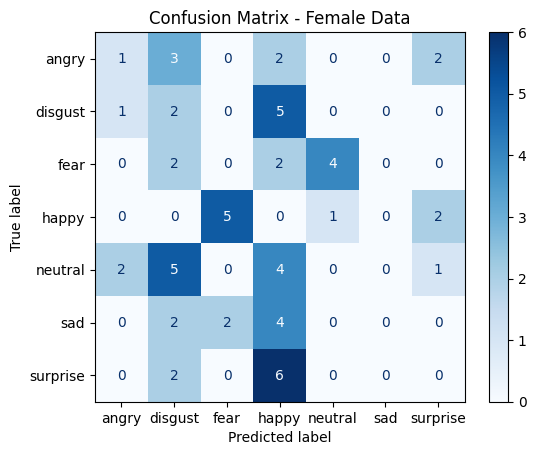

In [39]:
cm_female = confusion_matrix(y_female_true_classes, y_female_pred_classes)
disp_female = ConfusionMatrixDisplay(confusion_matrix=cm_female, display_labels=encoder.categories_[0])
disp_female.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Female Data")
plt.show()

In [40]:
# Path to the new audio file (recorded voice)
new_audio_file = 'testing.wav'

### Custom test

In [41]:
from IPython.display import Audio
Audio(new_audio_file)

In [42]:
# Extract features from the new audio file
mfcc_features = extract_mfcc(new_audio_file)
mfcc_features = np.expand_dims(mfcc_features, axis=0)  # Expand dims to match model input shape
mfcc_features = np.expand_dims(mfcc_features, axis=-1) # Expand dims to add channel dimension


In [43]:
# Make a prediction
predicted_probs = model.predict(mfcc_features)
predicted_class = np.argmax(predicted_probs, axis=1)

1/1 [==============================] - 0s 44ms/step


In [44]:
# Decode the predicted class to get the emotion label
emotion_labels = encoder.categories_[0]
predicted_emotion = emotion_labels[predicted_class[0]]

print(f'The predicted emotion for the new audio file is: {predicted_emotion}')

The predicted emotion for the new audio file is: sad
